## User Overview Analysis

* identify the top 10 handsets used by the customers.
* identify the top 3 handset manufacturers
* identify the top 5 handsets per top 3 handset manufacturer
* Make a short interpretation and recommendation to marketing teams

In [1]:
# import required packages and modules
import sys
sys.path.insert(0,'../scripts/')

import pandas as pd
import numpy as np
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the cleaned .csv dataset
df = pd.read_csv("../data/cleaned_telecom_data_source.csv",index_col=0)

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
from user_overview import UserOverview

# create an object of UserOverview class
user_ov = UserOverview(df)

In [15]:
# display the top 10 handsets
top_10_handsets = user_ov.get_top_handsets(10)
top_10_handsets

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

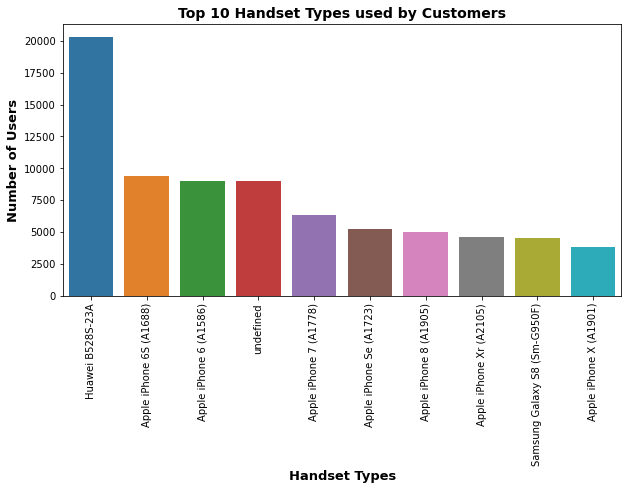

In [6]:
# display the top_handsets result in bar graph
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handset Types used by Customers', size=14, fontweight="bold")
plt.xlabel('Handset Types', size=13, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [9]:
# display the top 3 manufacturers
top_3_manufacturers = user_ov.get_top_manufacturers(3)
top_3_manufacturers 


Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

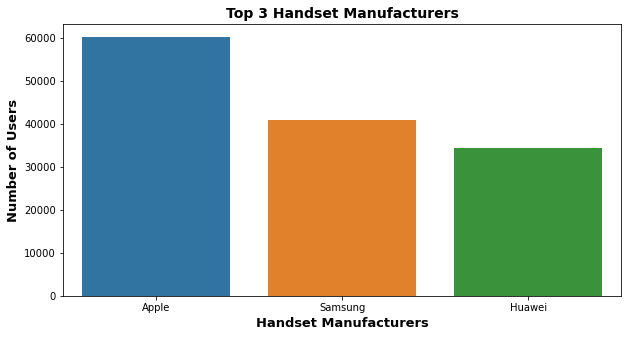

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [12]:
# display the top 5 handsets per top 3 manufacturers
top5_handsets_by_top3_manufacturers = user_ov.get_top_handset_by_top_manufacturer(5,3)
top5_handsets_by_top3_manufacturers

****Apple ****
Handset Type
Apple iPhone 6S (A1688)    6760
Apple iPhone 6 (A1586)     6261
Apple iPhone 7 (A1778)     4700
Apple iPhone Se (A1723)    3756
Apple iPhone 8 (A1905)     3544
Name: MSISDN/Number, dtype: int64
****Samsung ****
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3246
Samsung Galaxy J5 (Sm-J530)     2749
Samsung Galaxy A5 Sm-A520F      2709
Samsung Galaxy J3 (Sm-J330)     2590
Samsung Galaxy S7 (Sm-G930X)    2292
Name: MSISDN/Number, dtype: int64
****Huawei ****
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1532
Huawei E5180                       1183
Huawei P20                         1110
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64


### Insights and Interpretation

* The phones widely used in the network are manufactured by the Apple, Samsung and Huawei, contributing for 135,399 customers. 
* The most used phone is Hwawei B528S-23A covering 20324 of the phones followed by Apple iPhpone 6S (A1688) and Apple iPhone 6 (A1586).
* Samsung Galaxy S8 (Sm-G950F) is the most popular handset from the samsung handsets and The Huawei B528S-23A is one favoured by customers.